# Importing Data

In [681]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
pd.options.display.max_columns = 999
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

In [682]:
feature_dict = pd.read_csv('feature_dictionary.csv')

In [683]:
feature_dict.columns

Index(['Simplified ', 'Original Defination'], dtype='object')

In [684]:
feature_dict.head()

,Simplified,Original Defination
0,Y,PrCalifornia...all.sectors.cents.per.kilowatthour
1,f1,GenCalifornia...all.fuels..utility.scale..thou...
2,f2,GenCalifornia...coal.thousand.megawatthours
3,f3,GenCalifornia...petroleum.liquids.thousand.meg...
4,f4,GenCalifornia...petroleum.coke.thousand.megawa...


In [685]:
df = pd.read_csv('final_simplified columns.csv')

In [686]:
df.head()

,Month,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71
0,2002-01,11.32,14591.101,203.422,8.478,141.826,6687.453,103.435,3246.889,2515.525,1811.99852,-162.147,34.22148,1147.970,95.306,1052.664,1631.456110,54.04,63.29,47.27,25.334,228.396,476.540,221.720,15.114,3.056,8.254,169.367,33.695,23.789,226.851,474.996,3.79,7.38,98.3,6.51,79.8,4.05,20.3,3.10,79.7,306.171,0.597,13.173,319.941,3.306,0.841,2.465,17.136,290.967,14.303,305.271,8.07,7.49,4.73,7.2,6.95,815.227,435.234,95.508,113.889,572.219,686.108,781.616,72.857,1.270,74.127,381.434,2487.638,87.299,57783.392,19863.78826,153.550
1,2002-02,11.17,12655.472,183.984,17.693,103.712,5888.042,79.380,2868.838,1920.923,1626.95380,-65.137,31.08320,1010.228,98.123,912.105,1634.930471,59.60,70.89,38.86,20.747,198.932,428.354,205.410,13.339,3.410,7.263,148.458,29.727,21.185,199.370,428.792,3.76,7.23,98.5,6.40,80.7,3.70,20.5,2.86,86.2,269.476,0.500,11.850,281.826,2.793,0.863,1.930,7.200,263.728,12.827,276.556,8.19,7.68,4.76,7.2,6.97,712.863,399.911,86.015,99.869,532.753,632.621,718.636,65.626,1.147,66.772,344.243,2242.427,89.901,49870.077,17781.30058,151.520
2,2002-03,11.35,15788.658,213.429,6.819,155.603,7704.101,115.710,3227.002,2452.479,1933.86384,-53.867,33.51816,1117.726,87.477,1030.249,1638.404832,55.29,67.77,51.49,24.003,217.568,459.460,213.723,14.682,4.819,8.668,159.644,33.921,21.037,214.601,456.493,3.84,7.10,98.4,6.28,81.5,3.78,20.2,3.37,84.7,289.322,0.573,12.654,302.549,3.312,1.785,1.527,22.878,267.460,13.738,281.198,8.17,7.72,4.73,7.2,6.95,660.430,372.845,95.646,106.890,548.963,655.854,751.500,65.870,1.270,67.140,406.516,2258.431,94.771,67319.510,18227.13269,160.122
3,2002-04,10.99,13995.827,158.370,16.410,124.751,5634.562,114.715,3111.275,2913.902,1895.40032,-0.752,27.19368,1005.016,86.658,918.358,1641.879193,57.28,71.43,70.29,22.916,212.852,488.506,246.661,13.292,5.280,10.421,158.336,31.601,22.430,212.366,488.020,4.21,7.66,98.1,6.56,76.8,3.64,26.3,3.80,84.0,277.126,0.546,12.176,289.848,3.411,1.730,1.681,20.369,257.946,13.214,271.160,8.37,7.68,4.73,7.2,6.95,415.196,267.206,91.995,97.361,549.173,646.534,738.529,54.441,1.229,55.670,404.384,1880.985,84.479,47627.251,18614.30830,144.849
4,2002-05,12.11,13934.158,166.256,6.899,136.501,5661.771,105.900,2181.981,3462.756,2077.29368,101.112,33.68832,1100.673,93.821,1006.852,1645.353554,61.90,76.97,66.93,24.238,225.155,527.644,271.240,14.386,5.901,10.963,168.013,32.904,23.838,224.755,527.243,4.07,8.54,97.6,6.68,73.0,4.07,23.9,3.78,84.4,294.517,0.566,12.592,307.675,2.392,1.766,0.627,25.312,269.323,13.666,282.990,8.64,7.84,4.78,7.2,7.11,255.083,192.070,94.802,107.125,504.847,611.973,706.775,46.147,1.270,47.417,410.108,1611.453,77.060,48577.676,18614.74774,139.073


In [687]:
df.shape

(187, 73)

In [688]:
# Seperate training and testing data
df_train = df[df['Month']<'2015-01-01']
df_test = df[(df['Month']>'2014-12-01') & (df['Month']<'2017-01-01')]

In [689]:
# Make datetime as index
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('final_simplified columns.csv', parse_dates=['Month'],index_col='Month',date_parser=dateparse)

In [690]:
df.head()

,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,11.32,14591.101,203.422,8.478,141.826,6687.453,103.435,3246.889,2515.525,1811.99852,-162.147,34.22148,1147.970,95.306,1052.664,1631.456110,54.04,63.29,47.27,25.334,228.396,476.540,221.720,15.114,3.056,8.254,169.367,33.695,23.789,226.851,474.996,3.79,7.38,98.3,6.51,79.8,4.05,20.3,3.10,79.7,306.171,0.597,13.173,319.941,3.306,0.841,2.465,17.136,290.967,14.303,305.271,8.07,7.49,4.73,7.2,6.95,815.227,435.234,95.508,113.889,572.219,686.108,781.616,72.857,1.270,74.127,381.434,2487.638,87.299,57783.392,19863.78826,153.550
2002-02-01,11.17,12655.472,183.984,17.693,103.712,5888.042,79.380,2868.838,1920.923,1626.95380,-65.137,31.08320,1010.228,98.123,912.105,1634.930471,59.60,70.89,38.86,20.747,198.932,428.354,205.410,13.339,3.410,7.263,148.458,29.727,21.185,199.370,428.792,3.76,7.23,98.5,6.40,80.7,3.70,20.5,2.86,86.2,269.476,0.500,11.850,281.826,2.793,0.863,1.930,7.200,263.728,12.827,276.556,8.19,7.68,4.76,7.2,6.97,712.863,399.911,86.015,99.869,532.753,632.621,718.636,65.626,1.147,66.772,344.243,2242.427,89.901,49870.077,17781.30058,151.520
2002-03-01,11.35,15788.658,213.429,6.819,155.603,7704.101,115.710,3227.002,2452.479,1933.86384,-53.867,33.51816,1117.726,87.477,1030.249,1638.404832,55.29,67.77,51.49,24.003,217.568,459.460,213.723,14.682,4.819,8.668,159.644,33.921,21.037,214.601,456.493,3.84,7.10,98.4,6.28,81.5,3.78,20.2,3.37,84.7,289.322,0.573,12.654,302.549,3.312,1.785,1.527,22.878,267.460,13.738,281.198,8.17,7.72,4.73,7.2,6.95,660.430,372.845,95.646,106.890,548.963,655.854,751.500,65.870,1.270,67.140,406.516,2258.431,94.771,67319.510,18227.13269,160.122
2002-04-01,10.99,13995.827,158.370,16.410,124.751,5634.562,114.715,3111.275,2913.902,1895.40032,-0.752,27.19368,1005.016,86.658,918.358,1641.879193,57.28,71.43,70.29,22.916,212.852,488.506,246.661,13.292,5.280,10.421,158.336,31.601,22.430,212.366,488.020,4.21,7.66,98.1,6.56,76.8,3.64,26.3,3.80,84.0,277.126,0.546,12.176,289.848,3.411,1.730,1.681,20.369,257.946,13.214,271.160,8.37,7.68,4.73,7.2,6.95,415.196,267.206,91.995,97.361,549.173,646.534,738.529,54.441,1.229,55.670,404.384,1880.985,84.479,47627.251,18614.30830,144.849
2002-05-01,12.11,13934.158,166.256,6.899,136.501,5661.771,105.900,2181.981,3462.756,2077.29368,101.112,33.68832,1100.673,93.821,1006.852,1645.353554,61.90,76.97,66.93,24.238,225.155,527.644,271.240,14.386,5.901,10.963,168.013,32.904,23.838,224.755,527.243,4.07,8.54,97.6,6.68,73.0,4.07,23.9,3.78,84.4,294.517,0.566,12.592,307.675,2.392,1.766,0.627,25.312,269.323,13.666,282.990,8.64,7.84,4.78,7.2,7.11,255.083,192.070,94.802,107.125,504.847,611.973,706.775,46.147,1.270,47.417,410.108,1611.453,77.060,48577.676,18614.74774,139.073


# Feature Selection

In [691]:
## Applied VIF on R

In [692]:
# Selected Features = f3+f5+f6+f13+f15+f16+f18+f22+f26+f37+f38+f48+f49+f60+f70 
# 15 in total

In [693]:
df1 = df[['f6','f16','f23','f26','f38','f48','f60','f64']]

In [695]:
df1.head()

,f6,f16,f23,f26,f38,f48,f60,f64
Month,,,,,,,,
2002-01-01,103.435,54.04,15.114,169.367,3.10,290.967,572.219,1.270
2002-02-01,79.380,59.60,13.339,148.458,2.86,263.728,532.753,1.147
2002-03-01,115.710,55.29,14.682,159.644,3.37,267.460,548.963,1.270
2002-04-01,114.715,57.28,13.292,158.336,3.80,257.946,549.173,1.229
2002-05-01,105.900,61.90,14.386,168.013,3.78,269.323,504.847,1.270


In [13]:
feature_dict_selec = pd.read_csv('feature_dictionary_selected.csv')

In [14]:
feature_dict_selec

,Simplified,Original Defination
0,Y,PrCalifornia...all.sectors.cents.per.kilowatthour
1,f3,GenCalifornia...petroleum.liquids.thousand.meg...
2,f5,GenCalifornia...natural.gas.thousand.megawatth...
3,f6,GenCalifornia...other.gases.thousand.megawatth...
4,f13,GenCalifornia..Geothermal.electric.utility
5,f15,GDP
6,f16,Av.Temp
7,f18,Av.Rel.Humid
8,f22,Hydro.Consumption.TrillBtu.
9,f26,WoodConsump..TrillBTU.


In [696]:
feature_dict_selec['Original Defination'].tolist()

['PrCalifornia...all.sectors.cents.per.kilowatthour',
 'GenCalifornia...petroleum.liquids.thousand.megawatthours',
 'GenCalifornia...natural.gas.thousand.megawatthours',
 'GenCalifornia...other.gases.thousand.megawatthours',
 'GenCalifornia..Geothermal.electric.utility',
 'GDP',
 'Av.Temp',
 'Av.Rel.Humid',
 'Hydro.Consumption.TrillBtu.',
 'WoodConsump..TrillBTU.',
 'Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.',
 'Natural.Gas.Price..Electric.Power.Sector..Dollars.per.Thousand.Cubic.Feet.',
 'Electricity.Retail.Sales..Total..Billion.Kilowatthours.',
 'Electricity.Direct.Use..Billion.Kilowatthours.',
 'Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Non.CHP..Billion.Cubic.Feet.',
 'Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours']

# Check Stationarity

In [697]:
from statsmodels.tsa.stattools import adfuller

In [698]:
def test_stationarity(timeseries):
#Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dfoutput[0] < dfoutput[4]:
        print("TEST RESULT = stationary")
    else:
        print("TEST RESULT = non-stationary ")

Results of Dickey-Fuller Test:
Test Statistic                  -4.504344
p-value                          0.000193
#Lags Used                       1.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64
TEST RESULT = stationary


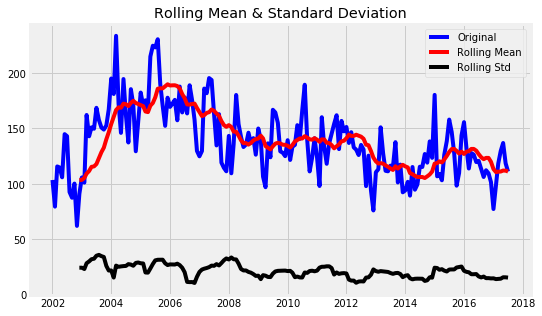

In [700]:
test_stationarity(df1['f6'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.821030
p-value                          0.370072
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = non-stationary 


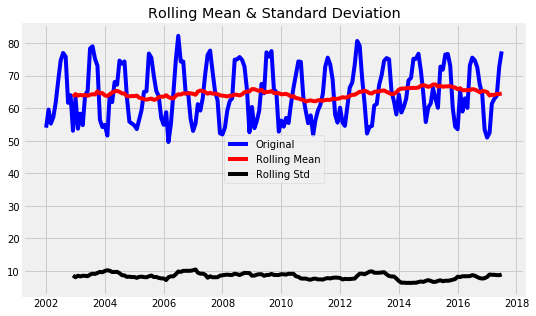

In [701]:
test_stationarity(df1['f16'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.212398
p-value                          0.937028
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = non-stationary 


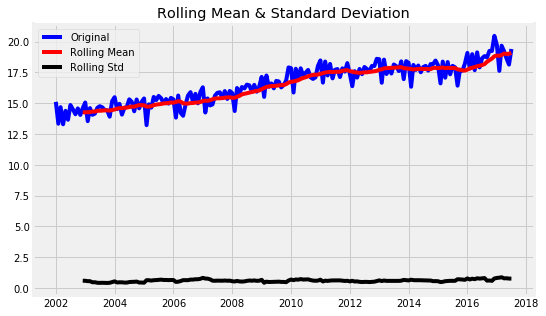

In [702]:
test_stationarity(df1['f23'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.772931
p-value                          0.062246
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64
TEST RESULT = non-stationary 


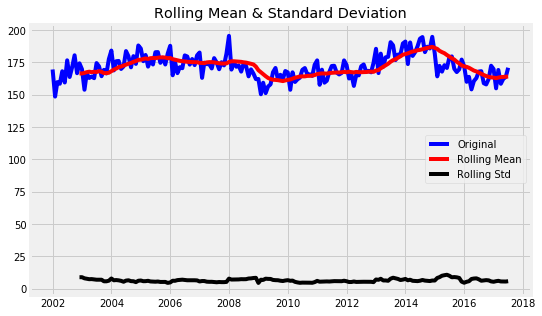

In [703]:
test_stationarity(df1['f26'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.842827
p-value                          0.052412
#Lags Used                       1.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64
TEST RESULT = non-stationary 


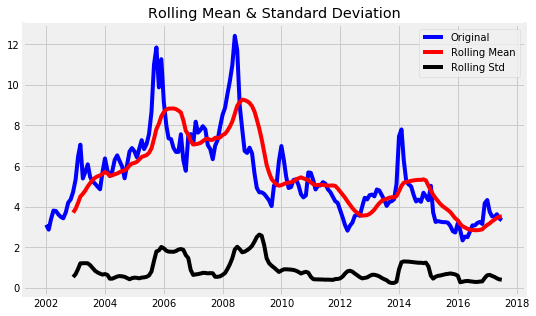

In [704]:
test_stationarity(df1['f38'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.197778
p-value                          0.207053
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = non-stationary 


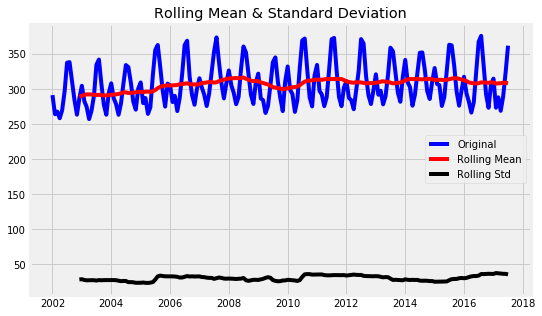

In [705]:
test_stationarity(df1['f48'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.661104
p-value                          0.451256
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = non-stationary 


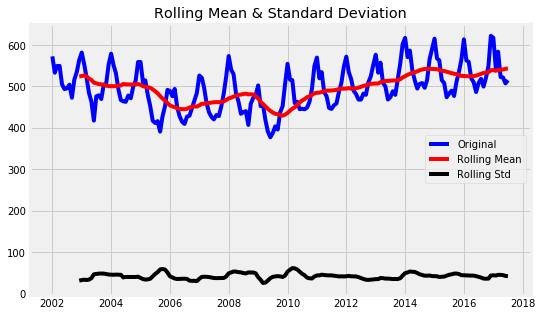

In [706]:
test_stationarity(df1['f60'])

Results of Dickey-Fuller Test:
Test Statistic                   0.238780
p-value                          0.974355
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = non-stationary 


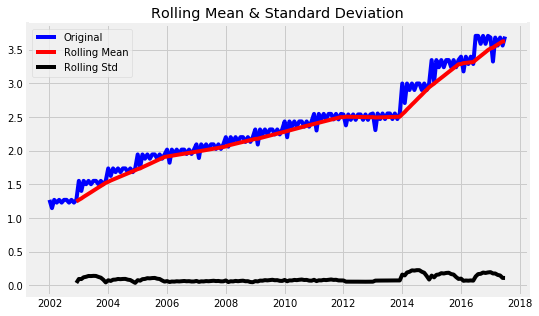

In [707]:
test_stationarity(df1['f64'])

# Price Plot

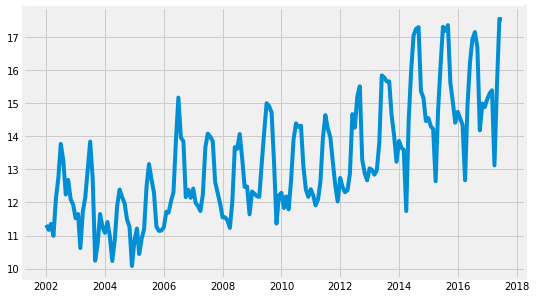

In [708]:
plt.plot(df['Price'])

# Remove Trend and Seasonality 1 - Differencing

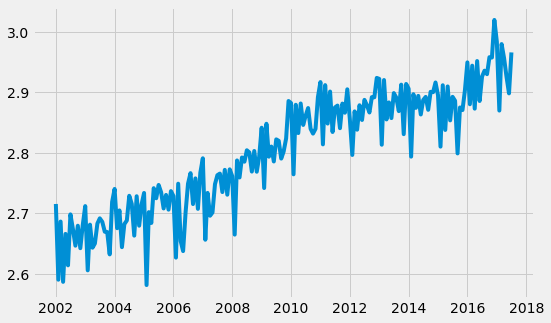

In [847]:
f3 = df1['f23']
f3_log = np.log(f3)
plt.plot(f3_log)

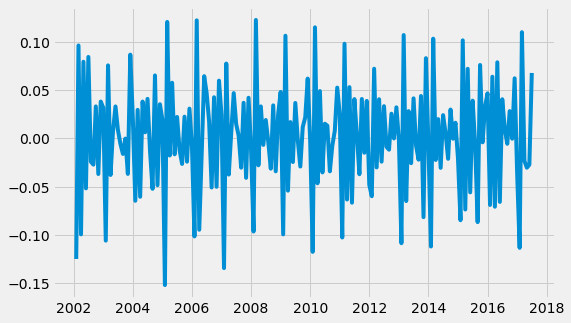

In [848]:
f3_log_diff = f3_log - f3_log.shift(1)
plt.plot(f3_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -5.308891
p-value                          0.000005
#Lags Used                      11.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64
TEST RESULT = stationary


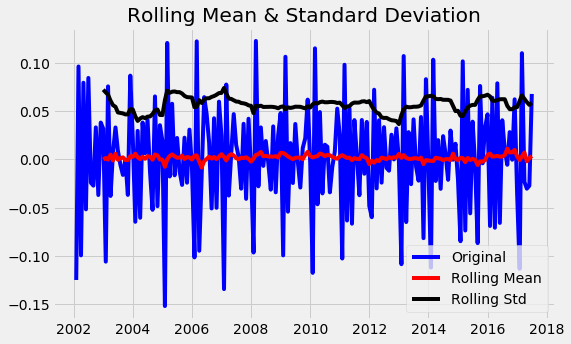

In [849]:
f3_log_diff.dropna(inplace=True)
test_stationarity(f3_log_diff)

In [850]:
f3 = f3_log_diff

# Remove Trend and Seasonality 2

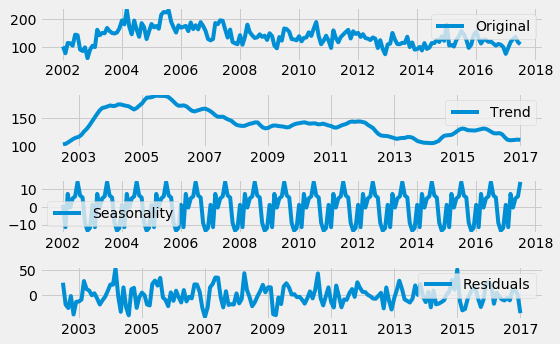

In [851]:
# 2.Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['f6'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1['f6'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Results of Dickey-Fuller Test:
Test Statistic                -6.366041e+00
p-value                        2.408585e-08
#Lags Used                     1.300000e+01
Number of Observations Used    1.610000e+02
Critical Value (1%)           -3.471633e+00
Critical Value (5%)           -2.879665e+00
Critical Value (10%)          -2.576434e+00
dtype: float64
TEST RESULT = stationary


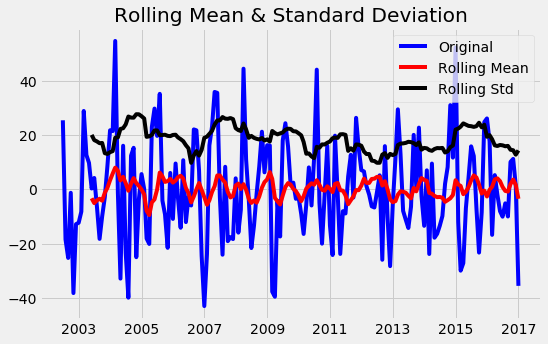

In [852]:
f3_decompose = residual
f3_decompose.dropna(inplace=True)
test_stationarity(f3_decompose)

# Forecasting a Time Series

In [853]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [854]:
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [855]:
# Seperate training and testing data
df_train = f3[f3.index < '2014-01-01']
df_test = f3[f3.index >'2013-12-01']

In [856]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-475.08902538463974
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-563.9751270187274
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-547.9364379461424
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-599.661517191154
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-545.5789606765411
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-562.019834988405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-514.037883734988
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-556.3466810473503
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-533.9921261022646
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-590.8622690441277
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-597.0572185684209
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-636.0545499684871
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-571.3524666452921
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-588.8873546625514
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-311.28233318778587
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-430.0547620939117
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-399.30944761761845
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-451.052697

In [857]:
# ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-35.43177937276254 - F5
# ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1.2874422691239804 - F6 
# ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:283.68631443663696 - F3-first difference
# ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-291.58332133054665 - F37
# ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-260.50062840029125 - F48

In [874]:
mod = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1, 0, 0),
                                seasonal_order=(0,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5362      0.064     -8.385      0.000      -0.662      -0.411
ma.S.L12       0.4810      0.082      5.883      0.000       0.321       0.641
sigma2         0.0013      0.000      9.173      0.000       0.001       0.002


In [875]:
prediction = []
df = df_test
for row in range(df.shape[0]):
    pred = results.predict(start = row, end = row, dynamic=True)
    prediction.append(pred[0])
prediction
df = pd.DataFrame(df)
df['prediction'] = prediction
df[list(df.columns)[0]] = df[list(df.columns)[0]].apply(pd.to_numeric)
#final_result[key] = df

In [876]:
df.head()

,f23,prediction
Month,,
2014-01-01,-0.007847,0.000000
2014-02-01,-0.112014,0.066990
2014-03-01,0.102947,-0.051440
2014-04-01,-0.022499,0.053333
2014-05-01,0.019735,-0.042412


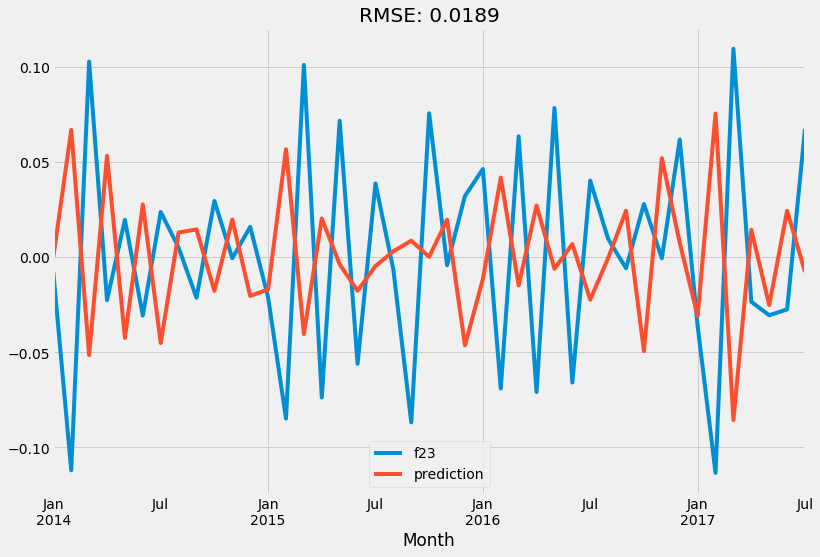

In [877]:
df[list(df.columns)].plot(figsize=(12,8))
plt.title('RMSE: %.4f'% np.sqrt(sum((df.iloc[0]-df.iloc[1])**2)/len(df)))

## Ignore below

# newDF = pd.DataFrame()
df_output = pd.DataFrame()

for key in final_result.keys():
    df_output["prediction_"+key] = df['prediction']
    df[list(df_test.columns)[0]] = pd.to_numeric(df[list(df.columns)[0]])
    df[list(df.columns)].plot(figsize=(12,8))
df_output

### Static Forecast

In [ ]:
#f3 = df1['f15']

In [ ]:
#pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
#pred_ci = pred.conf_int()

In [ ]:
ax = df_test.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('f3_train')
plt.legend()

plt.show()

In [ ]:
f3_forecasted = pred.predicted_mean
f3_truth = f3['2015-01-01':]

# Compute the mean square error
mse = ((f3_forecasted - f3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

### Dynamic Forecast

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = f3['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-01-01'), f3.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('f3')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
f3_forecasted = pred_dynamic.predicted_mean
f3_truth = f3['2015-01-01':]

# Compute the mean square error
mse = ((f3_forecasted - f3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Producing and Visualizing Forecasts

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = f3.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('f3')

plt.legend()
plt.show()

In [ ]:
decomposition = seasonal_decompose(f3, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.residual 

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf_f3 = acf(f3_log_diff, nlags=2)
lag_pacf_f3 = pacf(f3_log_diff, nlags=2, method='ols')

In [ ]:
#Plot ACF: q=0.7
plt.subplot(111) 
plt.plot(lag_acf_f3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
#Plot PACF: p = 2
plt.subplot(111)
plt.plot(lag_pacf_f3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR Model

In [ ]:
# (p,d,q) p =0.7

In [ ]:
model = ARIMA(f3_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-f3_log_diff)**2))

# MA Model

In [ ]:
model = ARIMA(f3_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - f3_log_diff)**2))

# ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(f3_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - f3_log_diff)**2))

In [ ]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(f3_log.ix[0], index=f3_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(f3)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_f3)**2)/len(ts)))

In [ ]:
plt.plot(f3)

In [ ]:
plt.plot(predictions_ARIMA)